# flyswot-gym 🦾

This notebook moves through the steps involved in training/updating a flyswot model. 

> This notebook assumes you have already updated the flysheet `dataset` (see the [flyswot-gym](https://github.com/davanstrien/flyswot-gym) repository for guidance on doing this.). 

The notebook goes through the following steps:
- downloads the training data
- prepares the dataset for training the model
- training the model 
- evaluating the model
- making a decision about whether to save the model 
- uploading the model to the 🤗 hub

In [ ]:
#@title Setup git and git-lfs
!apt install git-lfs && git init && git lfs install 
!git config --global credential.helper store

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Initialized empty Git repository in /content/.git/
Updated git hooks.
Git LFS initialized.


In [ ]:
#@title Install flyswot-gym
!pip -q install git+https://github.com/davanstrien/flyswot-gym.git

     |████████████████████████████████| 346 kB 4.3 MB/s 
     |████████████████████████████████| 431 kB 45.5 MB/s 
     |████████████████████████████████| 232 kB 51.7 MB/s 
     |████████████████████████████████| 4.2 MB 11.6 MB/s 
     |████████████████████████████████| 174 kB 55.9 MB/s 
     |████████████████████████████████| 99 kB 8.7 MB/s 
     |████████████████████████████████| 46 kB 2.7 MB/s 
     |████████████████████████████████| 64 kB 899 kB/s 
     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 140 kB 59.2 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 45.6 MB/s 
     |████████████████████████████████| 212 kB 60.8 MB/s 
     |████████████████████████████████| 596 kB 51.5 MB/s 
     |████████████████████████████████| 127 kB 57.4 MB/s 
     |████████████████████████████████| 144 kB 56.8 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |█████████████████████

In [ ]:
from huggingface_hub import notebook_login
import torch

### Check for Cuda 


In [ ]:
assert torch.cuda.is_available()

In [ ]:
#@title Define training options
model_checkpoint = 'flyswot/convnext-tiny-224_flyswot' #@param ["flyswot/convnext-tiny-224_flyswot", "davanstrien/deit_flyswot"] {allow-input: true}
training_dataset = "davanstrien/hugit_hmd_flysheet" #@param ["flyswot/flysheet_data"] {allow-input: true}
number_of_epochs = 25 #@param {type:"slider", min:10, max:100, step:1}

# Login to the 🤗 hub 

Since we're using private datasets and we want to have the option of pushing our models to the 🤗 hub we ned to ensure we are logged in.

In [ ]:
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


## Setup training data

This part of the notebook setups the training data for our model. The way in which the data is processed changes depending on our model which is why we need to pass in `model_checkpoint`

In [ ]:
from flyswot_gym.core import prep_data

In [ ]:
flyswot_data = prep_data(training_dataset, model_checkpoint=model_checkpoint)

Downloading:   0%|          | 0.00/894 [00:00<?, ?B/s]

Using custom data configuration davanstrien--hugit_hmd_flysheet-08100e1d1377c64b


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/davanstrien___parquet/davanstrien--hugit_hmd_flysheet-08100e1d1377c64b/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901. Subsequent calls will reuse this data.


Preparing dataset...

dropping duplicates...

  0%|          | 0/1600 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

getting ID...

  0%|          | 0/1275 [00:00<?, ?ex/s]

creating train, valid, test splits...

train has 892 examples

valid has 268 examples

test has 115 examples

Downloading:   0%|          | 0.00/266 [00:00<?, ?B/s]

## Model training 

In [ ]:
from flyswot_gym import core

In [ ]:
trainer = core.train_model(flyswot_data,
                           model_checkpoint, 
                           num_epochs=0.1)

Dataset({
    features: ['image', 'label', 'fpath', 'clean_path', 'id'],
    num_rows: 892
})

Downloading:   0%|          | 0.00/951 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/106M [00:00<?, ?B/s]

Cloning https://huggingface.co/flyswot/flyswot into local empty directory.


Download file pytorch_model.bin:   0%|          | 3.47k/106M [00:00<?, ?B/s]

Download file training_args.bin:  91%|######### | 2.83k/3.11k [00:00<?, ?B/s]

Clean file training_args.bin:  32%|###2      | 1.00k/3.11k [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/106M [00:00<?, ?B/s]

Using amp half precision backend
[codecarbon INFO @ 16:33:06] [setup] RAM Tracking...
[codecarbon INFO @ 16:33:06] [setup] GPU Tracking...
[codecarbon INFO @ 16:33:06] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:33:06] [setup] CPU Tracking...
[codecarbon WARNING @ 16:33:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:33:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:33:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:33:08] >>> Tracker's metadata:
[codecarbon INFO @ 16:33:08]   Platform system: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
[codecarbon INFO @ 16:33:08]   Python version: 3.7.13
[codecarbon INFO @ 16:33:08]   Available RAM : 12.683 GB
[codecarbon INFO @ 16:33:08]   CPU count: 2
[codecarbon INFO @ 16:33:08]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:33:08]   GPU count: 1
[codec

Epoch,Training Loss,Validation Loss,F1
0,No log,0.136829,0.979183


***** Running Evaluation *****
  Num examples = 268
  Batch size = 4
Saving model checkpoint to output_dir/checkpoint-23
Configuration saved in output_dir/checkpoint-23/config.json
Model weights saved in output_dir/checkpoint-23/pytorch_model.bin
Feature extractor saved in output_dir/checkpoint-23/preprocessor_config.json
Feature extractor saved in output_dir/preprocessor_config.json


Training completed. Do not forget to share your model on huggingface.co/models =)


[codecarbon INFO @ 16:33:23] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.7559428215026855 W
[codecarbon INFO @ 16:33:23] Energy consumed for all GPUs : 0.000137 kWh. All GPUs Power : 34.366 W
[codecarbon INFO @ 16:33:23] Energy consumed for all CPUs : 0.000170 kWh. All CPUs Power : 42.5 W
[codecarbon INFO @ 16:33:23] 0.000326 kWh of electricity used since the begining.


In [ ]:
outputs = trainer.predict(flyswot_data.test_ds)

***** Running Prediction *****
  Num examples = 115
  Batch size = 4


In [ ]:
outputs.metrics

{'test_f1': 0.9957184325108853,
 'test_loss': 0.09465770423412323,
 'test_runtime': 0.9806,
 'test_samples_per_second': 117.271,
 'test_steps_per_second': 29.573}

In [ ]:
from flyswot_gym.core import plot_confusion_matrix

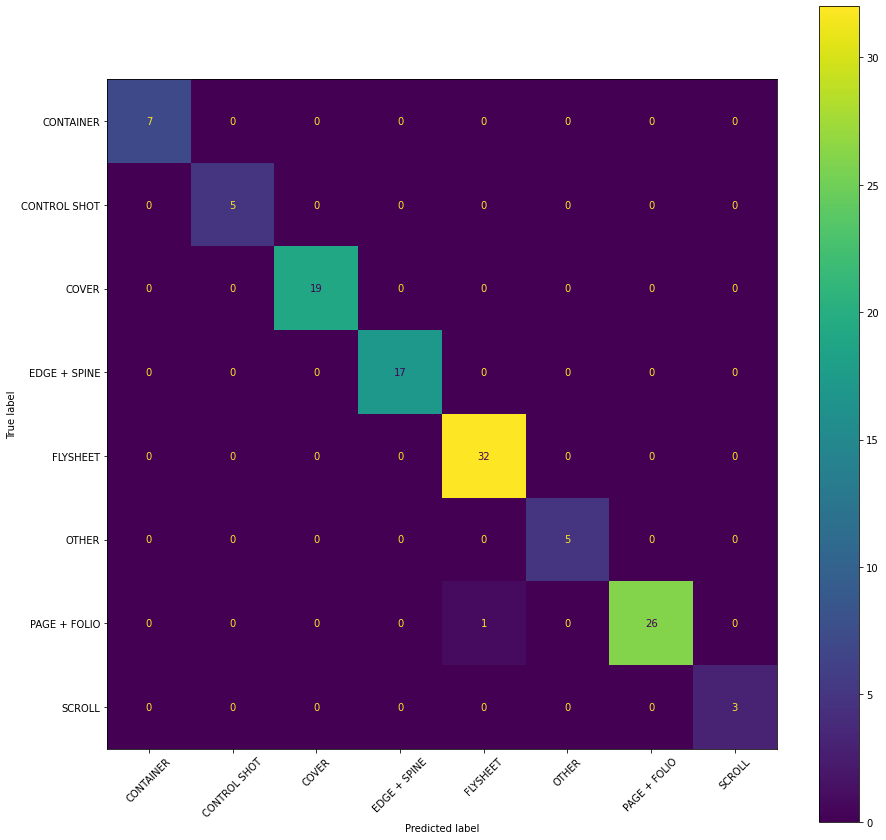

In [ ]:
plot_confusion_matrix(outputs,trainer=trainer)

In [ ]:
from flyswot_gym.core import create_misclassified_report

In [ ]:
create_misclassified_report(outputs,trainer, important_label='FLYSWOT', print_results=True)

misclasified:

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)
print(classification_report(y_true, y_pred, target_names=flyswot_data.train_ds.features['label'].names))

precision    recall  f1-score   support

   CONTAINER       1.00      1.00      1.00         7
CONTROL SHOT       1.00      1.00      1.00         5
       COVER       1.00      0.95      0.97        19
EDGE + SPINE       1.00      1.00      1.00        17
    FLYSHEET       0.97      1.00      0.98        32
       OTHER       1.00      1.00      1.00         5
PAGE + FOLIO       1.00      1.00      1.00        27
      SCROLL       1.00      1.00      1.00         3

    accuracy                           0.99       115
   macro avg       1.00      0.99      0.99       115
weighted avg       0.99      0.99      0.99       115

In [ ]:
from flyswot_gym.core import mis

In [ ]:
import pandas as pd

In [ ]:
!pip install rich['jupyter']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def misclasified_report(outputs,trainer, important_label=None, print_results=True):
    id2label = trainer.model.config.id2label
    y_true = outputs.label_ids
    y_pred = outputs.predictions.argmax(1)
    df = pd.DataFrame({"y_true":y_true,"y_pred": y_pred})
    df.y_true = df.y_true.map(id2label)
    df.y_pred = df.y_pred.map(id2label)
    if print_results:
        misclassifiied = df[df.y_true != df.y_pred]
        print('misclassified:')
        print(misclassifiied)
        print('\n')
        if important_label:
            print(f"Number of wrong predictions of {important_label} label: {len(misclassied[misclassied['y_pred']==important_label])}")
            print(f"Percentage of wrong predictions of {important_label} label: {(len(misclassied[misclassied['y_pred']==important_label])/len(df))*100}")
        return misclassied


In [ ]:
misclassied = misclasified_report(outputs,trainer,important_label='FLYSHEET')

misclassified:

y_true    y_pred
41  PAGE + FOLIO  FLYSHEET

Number of wrong predictions of FLYSHEET label: 1

Percentage of wrong predictions of FLYSHEET label: 0.8695652173913043

In [ ]:
flyswot_data.test_ds[misclassied.index]['image']

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F487FA2A550>]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
flyswot_data.test_ds

Dataset({
    features: ['image', 'label', 'fpath', 'clean_path', 'id'],
    num_rows: 115
})

In [ ]:
flyswot_data.test_ds[mistake_index]

{
    'image': [
        <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F487FB2CD90>
    ],
    'label': [6],
    'fpath': [
        '/Users/dvanstrien/Documents/DS/hugit-cli/fs/PAGE + FOLIO/or_790_f001v.jpg'
    ],
    'clean_path': [
        '/Users/dvanstrien/Documents/DS/hugit-cli/fs/PAGE + FOLIO/or_790_f001v'
    ],
    'id': ['or_790'],
    'pixel_values': [
        tensor([[[-1.1760, -1.1760, -1.1932,  ..., -1.3130, -1.3130, -1.3302],
         [-1.1932, -1.1760, -1.1932,  ..., -1.3130, -1.2788, -1.2959],
         [-1.1932, -1.1760, -1.2103,  ..., -1.2617, -1.2617, -1.2959],
         ...,
         [-1.1589, -1.1418, -1.1418,  ..., -1.1760, -0.5767,  0.0741],
         [-1.1589, -1.1589, -1.1418,  ..., -1.1075, -1.1932, -0.9877],
         [-1.1418, -1.1589, -1.1418,  ..., -1.1247, -1.1075, -1.1760]],

        [[-1.0903, -1.0728, -1.1078,  ..., -1.2129, -1.2304, -1.2304],
         [-1.0903, -1.0728, -1.1078,  ..., -1.2304, -1.1954, -1.2129],
         [-1.1078, -1.0903, -1.1078,  ..., -1.1779, -1.1954, -1.2129],
         ...,
         [-1.0553, -1.0378, -1.0553,  ..., -1.0903, -0.6001, -0.0924],
         [-1.0728, -1.0728, -1.0553,  ..., -1.0203, -1.0903, -0.9153],
         [-1.0553, -1.0728, -1.0553,  ..., -1.0378, -1.0203, -1.0903]],

        [[-0.8633, -0.8458, -0.8633,  ..., -0.9853, -1.0027, -1.0201],
         [-0.8633, -0.8458, -0.8633,  ..., -0.9853, -0.9678, -0.9853],
         [-0.8633, -0.8633, -0.8807,  ..., -0.9504, -0.9678, -0.9853],
         ...,
         [-0.8284, -0.8110, -0.8110,  ..., -0.8458, -0.6018, -0.3753],
         [-0.8284, -0.8284, -0.8110,  ..., -0.8284, -0.8633, -0.7413],
         [-0.8284, -0.8284, -0.8110,  ..., -0.8284, -0.8284, -0.8633]]])
    ]
}

In [ ]:
misclassied

,y_true,y_pred
41,PAGE + FOLIO,FLYSHEET


In [ ]:
for row in misclassied.items():
    print(row)

('y_true', 41    PAGE + FOLIO
Name: y_true, dtype: object)

('y_pred', 41    FLYSHEET
Name: y_pred, dtype: object)

In [ ]:
images = flyswot_data.test_ds[misclassied.index]['image']
labels = [id2label[label] for label in flyswot_data.test_ds[misclassied.index]['label']]
fpath = flyswot_data.test_ds[misclassied.index]['fpath']

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7F483A876DD0>]

In [ ]:
for row in misclassied.iterrows():
    print(f"model predicted {row[y_pred]}, actual label was {row.y_true}")
    image = flyswot_data.test_ds[row.index]
    imshow(image)

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ /usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882 in run_code  │
│                                                                                           │
│   2879 │   │   │   try:                                                                   │
│   2880 │   │   │   │   self.hooks.pre_run_code_hook()                                     │
│   2881 │   │   │   │   #rprint('Running code', repr(code_obj)) # dbg                      │
│ ❱ 2882 │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                  │
│   2883 │   │   │   finally:                                                               │
│   2884 │   │   │   │   # Reset our crash handler in place                                 │
│   2885 │   │   │   │   sys.excepthook = old_excepthook                                    │
│ <ipython-input-194-2de17b8ab36f>:2 in <module>                                            │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
"df = pd.DataFrame({"y_true":y_true,"y_pred": y_pred})

In [ ]:
id2label = trainer.model.config.id2label

In [ ]:
df.y_true = df.y_true.map(id2label)
df.y_pred = df.y_pred.map(id2label)

In [ ]:
misclassied = df[df.y_true != df.y_pred]

In [ ]:
misclassied[misclassied['y_pred']=='FLYSHEET']

,y_true,y_pred
41,PAGE + FOLIO,FLYSHEET


In [ ]:
mistake_index = df[df.y_true != df.y_pred].index.values

show images where the prediction is wrong 

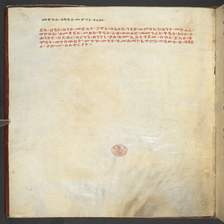

In [ ]:
flyswot_data.test_ds[mistake_index]['image'][0]

Push to hub?

In [ ]:
trainer.push_to_hub("finshed training")

Saving model checkpoint to output_dir
Configuration saved in output_dir/config.json
Model weights saved in output_dir/pytorch_model.bin
Feature extractor saved in output_dir/preprocessor_config.json
remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/flyswot/flyswot
   1985b7c..83dce9e  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Image Classification', 'type': 'image-classification'}}
remote: Enforcing permissions...        
remote: Allowed refs: all        
To https://huggingface.co/flyswot/flyswot
   83dce9e..00b7027  main -> main



'https://huggingface.co/flyswot/flyswot/commit/83dce9eb442c19102a75a16e307f14448287fea6'

TODO emmisions info in model card

In [ ]:
!pip install modelcards

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from modelcards import ModelCard

card = ModelCard.load('flyswot/flyswot')

Downloading:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

In [ ]:
card

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/output_dir/emissions.csv")

In [ ]:
df.columns

Index(['timestamp', 'project_name', 'run_id', 'duration', 'emissions',
       'emissions_rate', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'energy_consumed', 'country_name',
       'country_iso_code', 'region', 'cloud_provider', 'cloud_region', 'os',
       'python_version', 'cpu_count', 'cpu_model', 'gpu_count', 'gpu_model',
       'longitude', 'latitude', 'ram_total_size', 'tracking_mode', 'on_cloud'],
      dtype='object')

In [ ]:
df.region.values[0], df.country_name.values[0]

('oregon', 'United States')

In [ ]:
df['emissions']

0    0.000046
Name: emissions, dtype: float64

In [ ]:
card.data

tags:
- generated_from_trainer
model-index:
- name: flyswot
  results: []

In [ ]:
co2_eq_emissions:
      emissions: "0.000046"
      source: "code carbon"
      training_type: "fine-tuning"
      geographical_location: "as granular as possible, for instance Quebec, Canada or Brooklyn, NY, USA"
      hardware_used: "how much compute and what kind, e.g. 8 v100 GPUs"